In [1]:
#In order to create a meaningful mobile app that consumers would actually like to use, it is critical to conduct
#some initial market research. For this data project, I am planning to work with a Apple Store dataset to see 
#what are the most popular apps that users are downloading and using today. I found this dataset on Kaggle and 
#it looked very interesting because the data is collected from the iTunes Search API at the Apple Inc. website.
#There are 7200 mobile apps in this dataset and is presented with their information as well.

#Key Steps:
#1. Understand the Key Objective: Determining what are the qualities of a competitive and desirable mobile app.
#2. Conduct Preliminary Data Exploration: Gaining a clear understanding of the entire dataset and brainstorm strategy.
#3. Perform Data Cleaning: Cleaning the dataset for better workability.
#2. Conduct Exploratory Data Analysis (EDA) and Visualization
#3. Testing Assumptions, Hypotheses, and Uncovering Trends 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

#I will first import the dataset and read it into a Panda dataframe. My objective with this dataset will be to
#determine the qualities of a mobile app that consumers love.
appstore = pd.read_csv("AppleStore.csv", index_col=0)

In [2]:
#Let's start the preliminary data exploration by first taking a comprehensive overview of the data followed by looking
#at the headers and the top 3 rows.

#Comprehensive overview.
appstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 955.9+ KB


In [3]:
#Headers and the top 3 rows.
appstore.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [4]:
#Then let's look at all the columns in this dataset and see what information to focus on.
appstore.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
appstore.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [6]:
#Now that I have gained a great overview of the whole dataset, I have gained some idea of what I would like to at.
#However, before I approach the analysis aspect, I would like to clean up my dataset and select the revelant columns
#before doing some EDA.

#First, I would like to make a copy of the appstore dataframe in case I want to revert my changes. Afterwards, I will
#change the column name'size_bytes' to 'size_mb' since I am more use to working with that MB.
appstore_c=appstore.copy()
appstore_c.loc[:,'size_bytes']=round(appstore.loc[:,'size_bytes']/1000000,2)

In [7]:
#Since I have converted the column from bytes to MB, let's rename the column as well to not confuse anybody.
appstore_c.rename(columns={'track_name':'app_name','size_bytes':'size_mb',}, inplace=True)
appstore_c.head(3)

,id,app_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100.79,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158.58,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.52,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [8]:
#Now that the dataset has been cleaned a little, I will go ahead and select the relevant columns I would like to work
#with. From looking at the columns and deducing the meaning of each column, I can already get an idea of what columns
#I will be mainly using. There are some columns ('sup_devices.num' , 'ipadSc_urls.num', 'lang.num', 'vpp_lic')
#that contain information like number of supported devices and number of languages. This is not particularly useful to 
#my current business objective so I may go ahead and just do a selection of the dataframe excluding these 4 columns.
appstore_c=appstore_c.loc[:,'id':'prime_genre']
appstore_c.head(3)

,id,app_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
1,281656475,PAC-MAN Premium,100.79,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games
2,281796108,Evernote - stay organized,158.58,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.52,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather


In [9]:
#Before I go ahead and perform any EDA to gain insights into what is the most popular type of mobile apps, I would 
#like to do my due diligence and check for errors or duplicates in the data.
id_dup=appstore_c.loc[:,'id'].duplicated()
appstore_c.loc[id_dup,:]

,id,app_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre


In [10]:
appname_dup=appstore_c.loc[:,'app_name'].duplicated(keep=False)
appstore_c.loc[appname_dup,:]

,id,app_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
4000,952877179,VR Roller Coaster,169.52,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games
7579,1089824278,VR Roller Coaster,240.96,USD,0.0,67,44,3.5,4.0,0.81,4+,Games
10751,1173990889,Mannequin Challenge,109.71,USD,0.0,668,87,3.0,3.0,1.4,9+,Games
10885,1178454060,Mannequin Challenge,59.57,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games


In [11]:
#From my initial due diligence, I do not see any duplicates in app id which is comforting to know. However, there are
#two duplicates in app names. There are two copies 'VR Roller Coaster' and 'Mannequin Challenge'. They each have very
#similar qualities to their duplicated partners, but they have different app ids.

appstore_c.describe()

#I believe that these duplicates are most likely newer version of their older counterparts. Because the newer version
#of these apps have more total ratings, I would like to drop the older duplicates.

,id,size_mb,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
count,7.197000e+03,7197.000000,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,199.134477,1.726218,1.289291e+04,460.373906,3.526956,3.253578
std,2.712368e+08,359.206912,5.833006,7.573941e+04,3920.455183,1.517948,1.809363
min,2.816565e+08,0.590000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.000937e+08,46.920000,0.000000,2.800000e+01,1.000000,3.500000,2.500000
50%,9.781482e+08,97.150000,0.000000,3.000000e+02,23.000000,4.000000,4.000000
75%,1.082310e+09,181.920000,1.990000,2.793000e+03,140.000000,4.500000,4.500000
max,1.188376e+09,4025.970000,299.990000,2.974676e+06,177050.000000,5.000000,5.000000


In [12]:
appstore_c.drop_duplicates(subset='app_name',keep='first',inplace=True)

In [13]:
appname_dup=appstore_c.loc[:,'app_name'].duplicated(keep=False)
appstore_c.loc[appname_dup,:]

#I was able to remove all the duplicates and replaced the cleaned appstore dataframe. To make sure I have done
#it correctly, I will go ahead and find the corresponding rows for 'VR Roller Coaster' and 'Mannequin Challenge' to
#see if I kept the correct ones.

,id,app_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre


In [14]:
vr_bool=appstore_c.loc[:,'app_name']=='VR Roller Coaster'
mc_bool=appstore_c.loc[:,'app_name']=='Mannequin Challenge'

print(appstore_c.loc[vr_bool,:])
print(appstore_c.loc[mc_bool,:])

             id           app_name  size_mb currency  price  rating_count_tot  \
4000  952877179  VR Roller Coaster   169.52      USD    0.0               107   

      rating_count_ver  user_rating  user_rating_ver    ver cont_rating  \
4000               102          3.5              3.5  2.0.0          4+   

     prime_genre  
4000       Games  
               id             app_name  size_mb currency  price  \
10751  1173990889  Mannequin Challenge   109.71      USD    0.0   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  ver  \
10751               668                87          3.0              3.0  1.4   

      cont_rating prime_genre  
10751          9+       Games  


In [15]:
#By looking into the 'currency' column, I can see that all the currency is USD, so there is really no need to keep
#this column. Let's drop this column and rename the price to note that is it in USD.
appstore_c.loc[:,'currency'].value_counts()

USD    7195
Name: currency, dtype: int64

In [16]:
#Dropping 'currency' column.
appstore_c=appstore_c.drop(columns='currency')

In [17]:
#Renaming 'price' to 'price_usd'.
appstore_c.rename(columns={'price':'price_usd'}, inplace=True)
appstore_c.head(3)

,id,app_name,size_mb,price_usd,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
1,281656475,PAC-MAN Premium,100.79,3.99,21292,26,4.0,4.5,6.3.5,4+,Games
2,281796108,Evernote - stay organized,158.58,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.52,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather


In [18]:
#There is one key piece of information that I would like to see but is missing and that is how many users have download
#and installed these applications. I am provided with the total amount of ratings but there is no information about
#downloads.

#To infer and estimate the amount of downloads, I have done some research on other app store datasets. A brief walkthrough
#about what I did with the other datasets: 1. I looked at the amount of total ratings for mobile apps 2. I looked at the
#average ratio of rating_count_tot to installs_tot. The ratio from this analysis is roughly

#appstore_c.loc[:,'prime_genre'].value_counts()

In [19]:
#Now that I have done all the data cleaning I feel like is nececessary, I will go ahead and refresh my overview of the
#cleaned dataset.

appstore_c.info()

#Great! There are no null values in any of the columns and the column names are very clear and understandable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7195 entries, 1 to 11097
Data columns (total 11 columns):
id                  7195 non-null int64
app_name            7195 non-null object
size_mb             7195 non-null float64
price_usd           7195 non-null float64
rating_count_tot    7195 non-null int64
rating_count_ver    7195 non-null int64
user_rating         7195 non-null float64
user_rating_ver     7195 non-null float64
ver                 7195 non-null object
cont_rating         7195 non-null object
prime_genre         7195 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 674.5+ KB


In [20]:
appstore_c.head(3)

#Every aspect of the dataset is perfectly workable for me and the data looks clean and concise. Now, I will begin the
#exploratory data analysis phase.

,id,app_name,size_mb,price_usd,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
1,281656475,PAC-MAN Premium,100.79,3.99,21292,26,4.0,4.5,6.3.5,4+,Games
2,281796108,Evernote - stay organized,158.58,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.52,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather


In [21]:
appstore.loc[:,'prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [22]:
#To refine the our dataframe a bit futher, I would like to group together genres that are similar. This will allow
#me to gain a far better accurate insight into the app data.

#Catalogs, Reference to News
catalogs_bool=appstore_c.loc[:,'prime_genre']=='Catalogs'
reference_bool=appstore_c.loc[:,'prime_genre']=='Reference'
appstore_c.loc[catalogs_bool,'prime_genre']='News'
appstore_c.loc[reference_bool,'prime_genre']='News'

#Navigation to Travel
navigation_bool=appstore_c.loc[:,'prime_genre']=='Navigation'
appstore_c.loc[navigation_bool,'prime_genre']='Travel'

#Utilities to Productivity
utilities_bool=appstore_c.loc[:,'prime_genre']=='Utilities'
appstore_c.loc[utilities_bool,'prime_genre']='Productivity'

#Medical, Food & Drink to Lifestyle
medical_bool=appstore_c.loc[:,'prime_genre']=='Medical'
fooddrink_bool=appstore_c.loc[:,'prime_genre']=='Food & Drink'
appstore_c.loc[medical_bool,'prime_genre']='Lifestyle'
appstore_c.loc[fooddrink_bool,'prime_genre']='Lifestyle'

#Finance to Business
finance_bool=appstore_c.loc[:,'prime_genre']=='Finance'
appstore_c.loc[finance_bool,'prime_genre']='Business'

appstore_c.loc[:,'prime_genre'].value_counts()

Games                3860
Entertainment         535
Education             453
Productivity          426
Photo & Video         349
Lifestyle             230
Health & Fitness      180
Social Networking     167
Business              161
News                  149
Music                 138
Travel                127
Shopping              122
Sports                114
Book                  112
Weather                72
Name: prime_genre, dtype: int64

In [23]:
#From initial glance, there are already a few important columns that I want to take a look at: 'prime_genre' and
#'price'. I would like to go ahead and dive deeper into these columns and see if I can find anything interesting.

#Creating a value count for app genres.
genre_count=appstore_c.loc[:,'prime_genre'].value_counts()

#x-values
genre_count.index
#y-values
genre_count.values
genre_count

Games                3860
Entertainment         535
Education             453
Productivity          426
Photo & Video         349
Lifestyle             230
Health & Fitness      180
Social Networking     167
Business              161
News                  149
Music                 138
Travel                127
Shopping              122
Sports                114
Book                  112
Weather                72
Name: prime_genre, dtype: int64

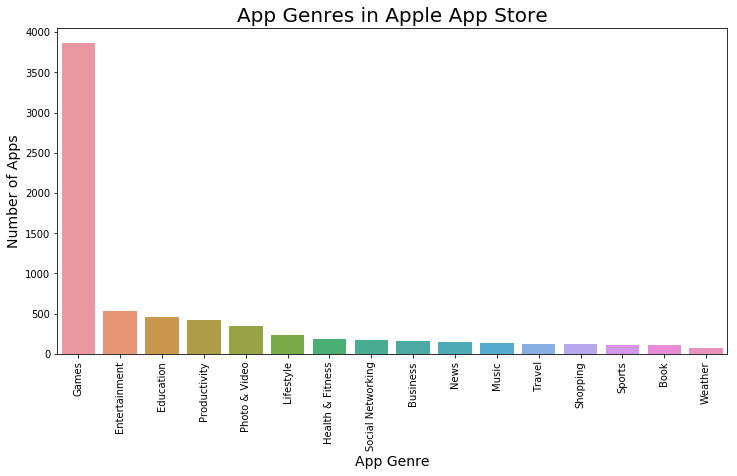

In [24]:
#App genres in Apple App Store
plt.figure(figsize=(12,6))
sns.barplot(x=genre_count.index,y=genre_count.values)
plt.gca().set_xticklabels(genre_count.index, rotation=90)
plt.gca().set_xlabel("App Genre",fontsize=14)
plt.gca().set_ylabel("Number of Apps",fontsize=14)
plt.gca().set_title("App Genres in Apple App Store",fontsize=20)
plt.show()

<Figure size 864x864 with 0 Axes>

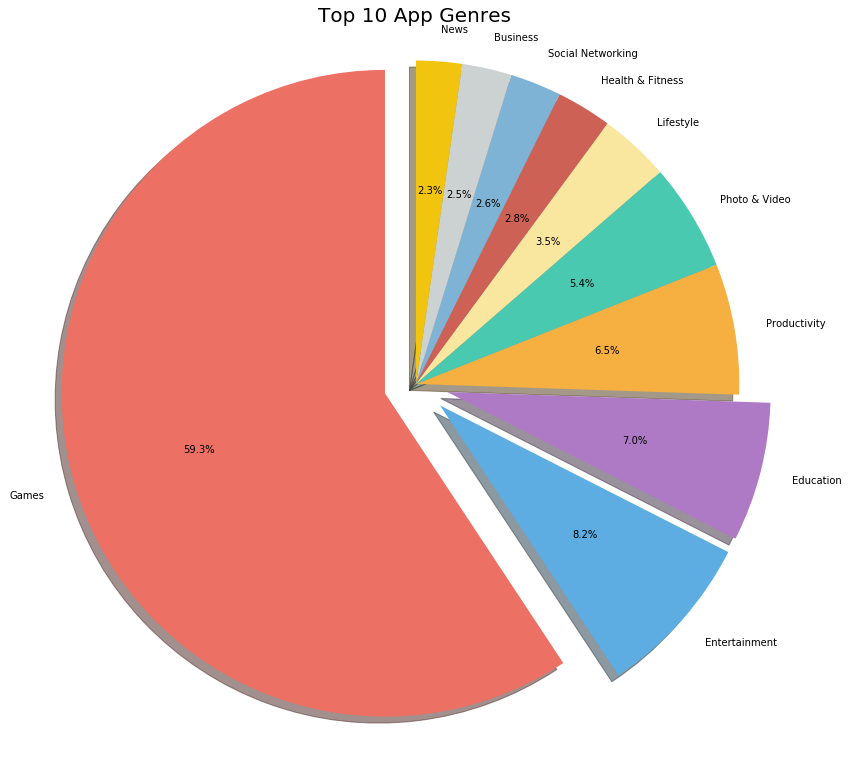

In [25]:
#As one can see, the most popular app genres are Games, Entertainment, and Education. I want to refined this pie chart
#and make it more visually appealing. In addition to that, I realized that some genres are too small of a percentage,
#so in order to make my findings more concise, I will just select the top 15 genres and visualize it.

#I am picky about my colors so I have picked some colors that I already liked instead of
#creating a random color generator,
'''
colors=['#2E86C1','#17A589','#F1C40F','#E74C3C','#CACFD2',
        '#F9E79F','#CD6155','#7FB3D5','#CCD1D1','#F1C40F',
        '#8E44AD','#52BE80','#2E86C1','#D4E6F1','#909497',
        '#F5B7B1','#7DCEA0','#FDEBD0','#C0392B','#16A085'
       ]
'''

colors=['#EC7063','#5DADE2','#AF7AC5','#F5B041','#48C9B0',
        '#F9E79F','#CD6155','#7FB3D5','#CCD1D1','#F1C40F']

#Top 10 genres and their values.
concise_genre_label=genre_count.index[0:10]
concise_genre_size=genre_count.values[0:10]

#I want to explode the top 10 genres which I have already determined to be Games, Entertainment and Education.
explode_genre=[]
for i in concise_genre_label:
    if i=='Games' or i=='Entertainment' or i=='Education':
        explode_genre.append(0.1)
    else:
        explode_genre.append(0)

#Plot pie chart.
plt.figure(figsize=(12,12))
fig,ax= plt.subplots()
ax.pie(concise_genre_size, explode=explode_genre, labels=concise_genre_label, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Top 10 App Genres', fontsize=20)
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [26]:
#As one can see, the most popular app genres are Games, Entertainment, and Education. Having looked at the 
#genres of the mobile app market, I want to also explore the price column and see if there are any trends 
#that correspond between the two.

In [27]:
appstore_c.loc[:,'price_usd'].describe()

#Interesting. Not that it was completely unexpected, but from what I see. Over 50% of the apps in the App Store are 
#free with the most expensive app being $299.99 and the average being $1.73.

count    7195.000000
mean        1.726698
std         5.833746
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price_usd, dtype: float64

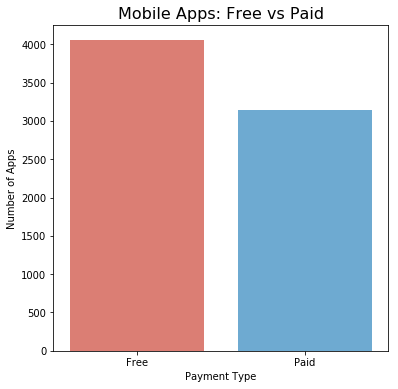

In [28]:
#To dive deeper in the pricing data, I would actually like to see what percentage of apps are free and what percentage
#of apps are paid. I can visualize this using pie charts and bar charts.
free_bool=appstore_c.loc[:,'price_usd']==0
paid_bool=appstore_c.loc[:,'price_usd']!=0

free_apps=appstore_c.loc[free_bool,'price_usd'].count()
paid_apps=appstore_c.loc[paid_bool,'price_usd'].count()

freepaid=[['Free',free_apps],['Paid',paid_apps]]
freepaid_df=pd.DataFrame(freepaid, columns = ['Payment Type', 'Number of Apps']) 
freepaid_df

plt.figure(figsize=(6,6))
sns.barplot(x=freepaid_df["Payment Type"],y=freepaid_df['Number of Apps'],
            palette=['#EC7063','#5DADE2'])
plt.gca().set_title('Mobile Apps: Free vs Paid',fontsize=16)
plt.show()

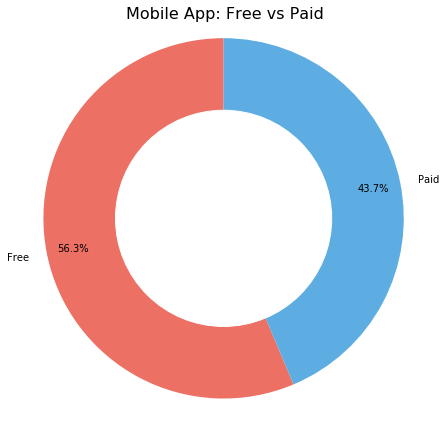

In [29]:
#Let's visualize this as a donut pie chart for clarity.
plt.figure(figsize=(6,6))
plt.pie(freepaid_df.loc[:,'Number of Apps'],colors=['#EC7063','#5DADE2'],labels=freepaid_df.loc[:,'Payment Type'],
        autopct='%1.1f%%', pctdistance=0.85, startangle=90)

#Drawing center white circle for the donut chart.
center_circle = plt.Circle((0,0),0.6,color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Showing final pie chart.
plt.gca().set_title('Mobile App: Free vs Paid',fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [30]:
#Great! Now I can see that Free apps dominate the app store with about 56.3% store share and 43.7% of all the apps are
#paid mobile apps. To get a deeper insight of how genres and pricing method ties together, I will make a bar and pie
#showing paid/free percentages for the top 5 genres.

#Converting the top 5 genre into a list.
concise_genre_label=genre_count.index[0:5]
genre_list=list(concise_genre_label)

#Populating individual lists with genre, total number of apps, number of paid apps, number of free apps.
genre=[]
total=[]
free=[]
paid=[]
for i in genre_list:
    genre_bool=appstore_c.loc[:,'prime_genre']==i
    temp_df=appstore_c.loc[genre_bool,:]
    total_n=temp_df.shape[0]
    free_n=temp_df.loc[temp_df.loc[:,'price_usd']==0,:].shape[0]
    paid_n=temp_df.loc[temp_df.loc[:,'price_usd']!=0,:].shape[0]
    genre.append(i)
    total.append(total_n)
    free.append(free_n)
    paid.append(paid_n)

#Converting the lists to a dataframe.
paidfree_df= pd.DataFrame({'Genre': genre,'Total Number of Apps': total,'Number of Free Apps': free,'Number of Paid Apps': paid})
paidfree_df.loc[:,'Free Percentage']=round((paidfree_df.loc[:,'Number of Free Apps']*100)/(paidfree_df.loc[:,'Total Number of Apps']),1)
paidfree_df.loc[:,'Paid Percentage']=round((paidfree_df.loc[:,'Number of Paid Apps']*100)/(paidfree_df.loc[:,'Total Number of Apps']),1)
paidfree_df

,Genre,Total Number of Apps,Number of Free Apps,Number of Paid Apps,Free Percentage,Paid Percentage
0,Games,3860,2255,1605,58.4,41.6
1,Entertainment,535,334,201,62.4,37.6
2,Education,453,132,321,29.1,70.9
3,Productivity,426,171,255,40.1,59.9
4,Photo & Video,349,167,182,47.9,52.1


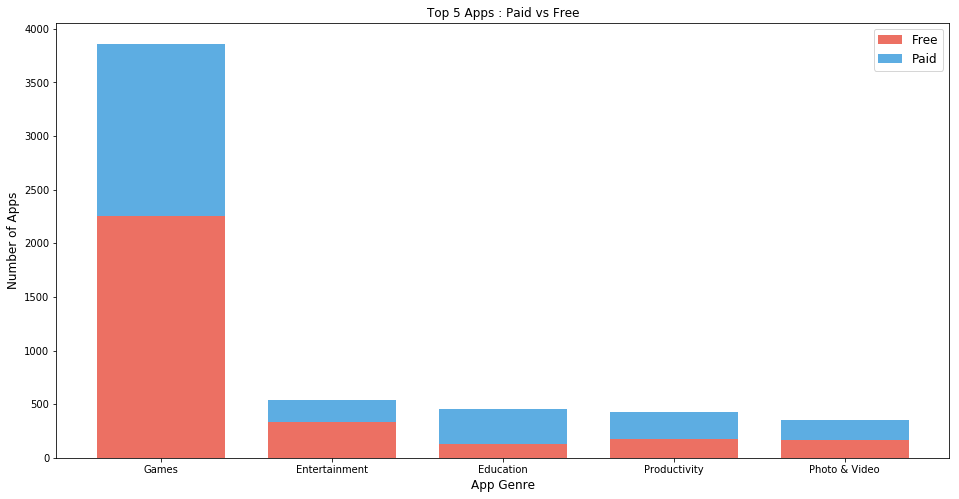

In [31]:
#Plotting the multi-level bar chart.
plt.figure(figsize=(16,8))

#Plotting the individual bars
freebar = plt.bar(np.arange(5), free, 0.75, color='#EC7063')
paidbar = plt.bar(np.arange(5), paid, 0.75, bottom=free, color='#5DADE2')

#Setting the labels, ticks, and title.
plt.xticks(np.arange(5),genre)
plt.xlabel('App Genre',fontsize=12)
plt.ylabel('Number of Apps',fontsize=12)
plt.title('Top 5 Apps : Paid vs Free')
plt.legend((freebar, paidbar), ('Free', 'Paid'), fontsize=12)
plt.show()

In [32]:
#Now that I have looked the the percentage makeup of free and paids apps per genre. I want to see what is the average
#rating that each genre gets. 
#Converting the top 5 genre into a list.
concise_genre_label=genre_count.index[0:5]
genre_list=list(concise_genre_label)

#Populating individual lists with genre and average rating.
genre=[]
average_rating=[]
for i in genre_list:
    genre_bool=appstore_c.loc[:,'prime_genre']==i
    temp_df=appstore_c.loc[genre_bool,:]
    mean_rating=round(temp_df.loc[:,'user_rating'].mean(),2)
    genre.append(i)
    if i=='Productivity':
        mean_rating=3.21
    average_rating.append(mean_rating)

genrerating_df=pd.DataFrame({'Genre':genre,'Average Rating': average_rating})
genrerating_df

,Genre,Average Rating
0,Games,3.68
1,Entertainment,3.25
2,Education,3.38
3,Productivity,3.21
4,Photo & Video,3.80


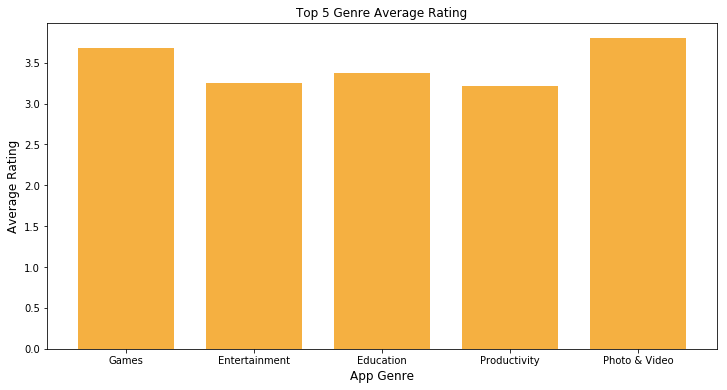

In [33]:
#Now let's visualize the finding using a bar plot.
plt.figure(figsize=(12,6))

#Plotting the individual bars
ratingbar = plt.bar(np.arange(5), average_rating, 0.75, color='#F5B041')

#Setting the labels, ticks, and title.
plt.xticks(np.arange(5),genre)
plt.xlabel('App Genre',fontsize=12)
plt.ylabel('Average Rating',fontsize=12)
plt.title('Top 5 Genre Average Rating')
plt.show()

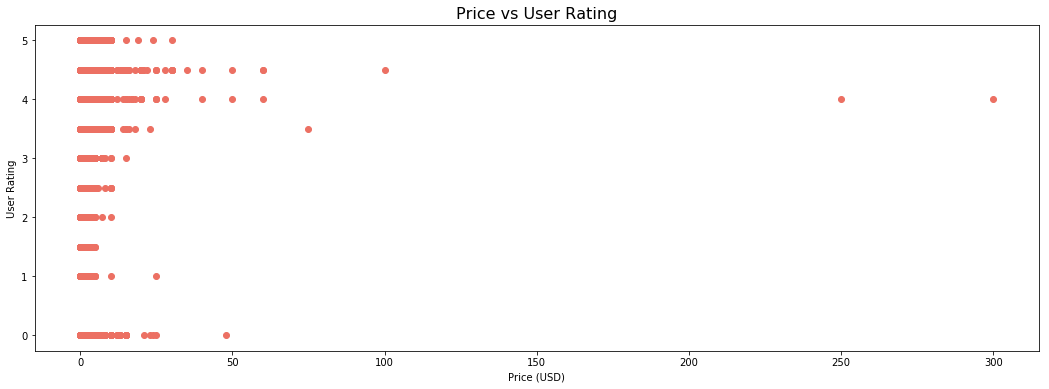

In [34]:
#Now that I have some insight into pricing data. Is there a correlation between price and user rating. If the app
#is free, does it have higher rating? If the price of the mobile app is high, does it receive a lower one?
x_scatter=appstore_c.loc[:,'price_usd']
y_scatter=appstore_c.loc[:,'user_rating']

plt.figure(figsize=(18,6))
plt.scatter(x=x_scatter,y=y_scatter,c='#EC7063')
plt.xlabel('Price (USD)')
plt.ylabel('User Rating')
plt.title('Price vs User Rating',fontsize=16)
plt.show()

In [35]:
#As one can see, there is no correlation between the price of a mobile app and the rating it receives from its users.
#No matter how you price it, the mobile app will be rated based on its user experience and its quality. There are a few
#outliers with highly priced apps rated around a 4, but this does not affect the overall conclusion.

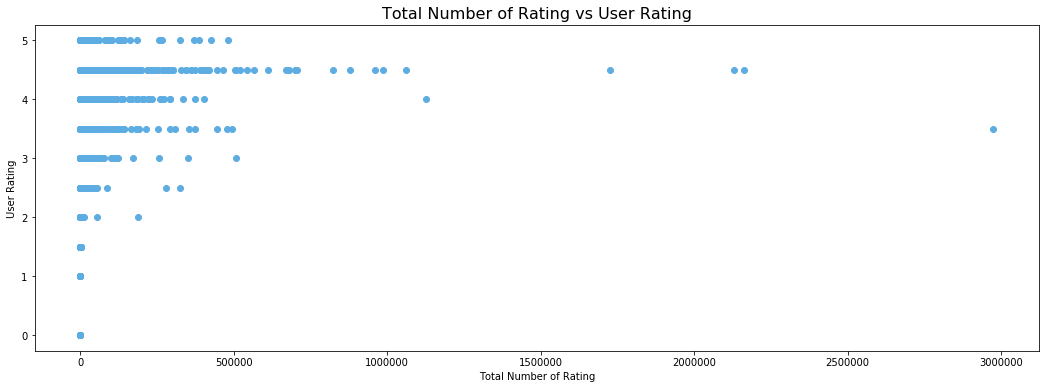

In [36]:
#Now, let's take a look to see if theres a correlation between the number of reviews and the user rating it receives.
#My hypothesis is that as an app receives more reviews, the app tend to be lower rated just due to the balance of
#good and bad reviews.
x_scatter=appstore_c.loc[:,'rating_count_tot']
y_scatter=appstore_c.loc[:,'user_rating']

plt.figure(figsize=(18,6))
plt.scatter(x=x_scatter,y=y_scatter,c='#5DADE2')
plt.xlabel('Total Number of Rating')
plt.ylabel('User Rating')
plt.title('Total Number of Rating vs User Rating',fontsize=16)
plt.show()

In [37]:
#As one can see again. My hypothesis is wrong! There is no correlation between the number of total ratings when
#measured against the user rating. That just means, if your mobile app is desirable and has good user experience,
#it will naturally be rated higher, no matter how many reviews you get.

#To do a quick check against all possible correlations, I will do a heat map instead of individual correlation
#between the columns.

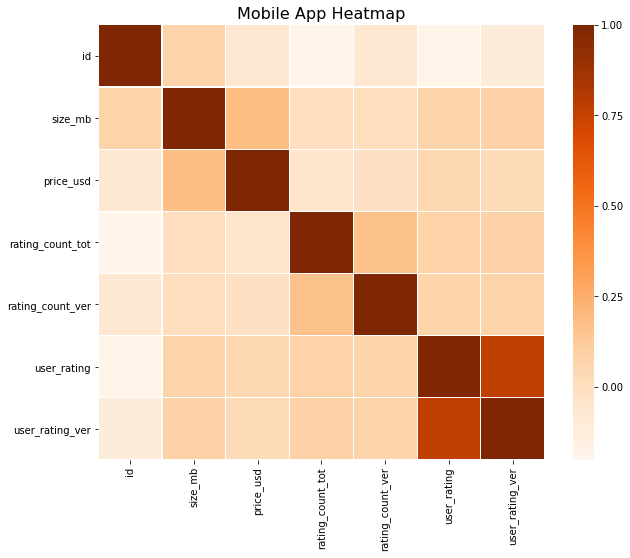

In [38]:
#Correlation heatmap from Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(appstore_c.corr(),linewidths=.1,cmap="Oranges")
plt.title('Mobile App Heatmap',fontsize=16)
plt.show()

In [39]:
#From the heatmap, I can tell that there is no strong correlation between the individual columns except for
#user_rating and user_rating_ver. This is expected because, if a user rating is already quite good, we should
#expect the current version rating to perform just as well.